In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

In [3]:
mpl.style.use('default')
mpl.rcParams["figure.figsize"] = [3.5, 3.5]
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["font.size"] = 7
mpl.rcParams["font.family"] = 'sans-serif'
mpl.rcParams["font.sans-serif"] = 'Arial'
mpl.rcParams["mathtext.fontset"] = 'cm'
mpl.rcParams['text.usetex'] = False

In [4]:
class_name =  ['Powerline', 'Low vegetation', 'Impervious surface', 'Car', 'Fence', 'Roof', 'Facade', 'Shrub', 'Tree']

In [5]:
train_data = np.loadtxt('./data/Vaihingen3D_Traininig_fpfh_5_ground.txt', skiprows=11)
train_data_fpfh = train_data[:, 1:34]
train_data_class = train_data[:, 34]

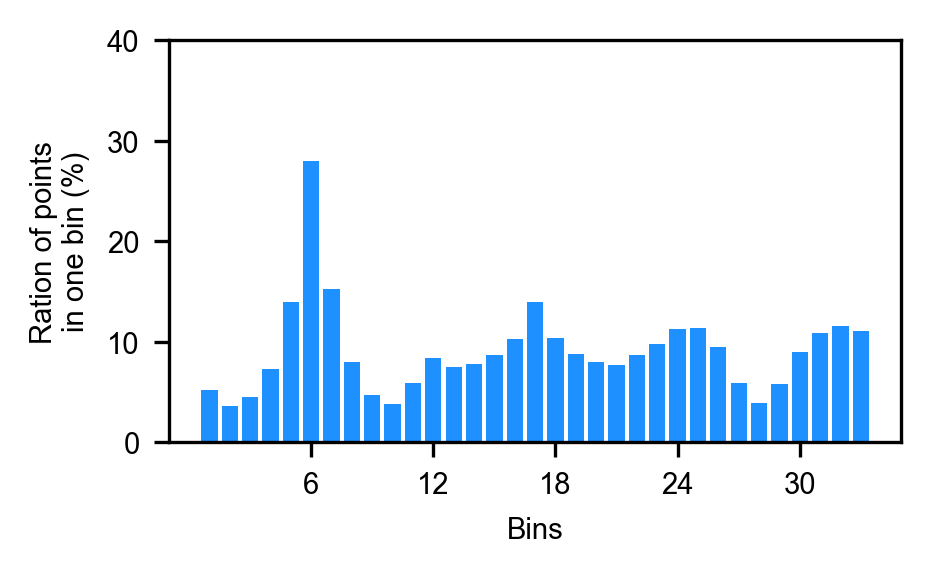

In [6]:
specify_class = train_data_class == 8
feature = train_data_fpfh[specify_class]
feature_mean = np.mean(feature, axis=0)

fig, ax = plt.subplots(figsize=(3, 1.8), constrained_layout=True)
plot_x = np.arange(len(feature_mean))+1
ax.bar(plot_x, feature_mean, color='#1e90ff', lw=2, label = 'fpfh')


ax.set_xlim(-1,35)
ax.set_xticks(np.arange(6, 34, 6))
ax.set_xticklabels(np.arange(6, 34, 6))
ax.set_xlabel('Bins')

ax.set_ylim(0,40)
ax.set_yticks(np.arange(0, 41, 10))
ax.set_yticklabels(np.arange(0, 411, 10))
ax.set_ylabel('Ration of points\nin one bin (%)')
fig.savefig("result/figure/tree_fpfh.png")

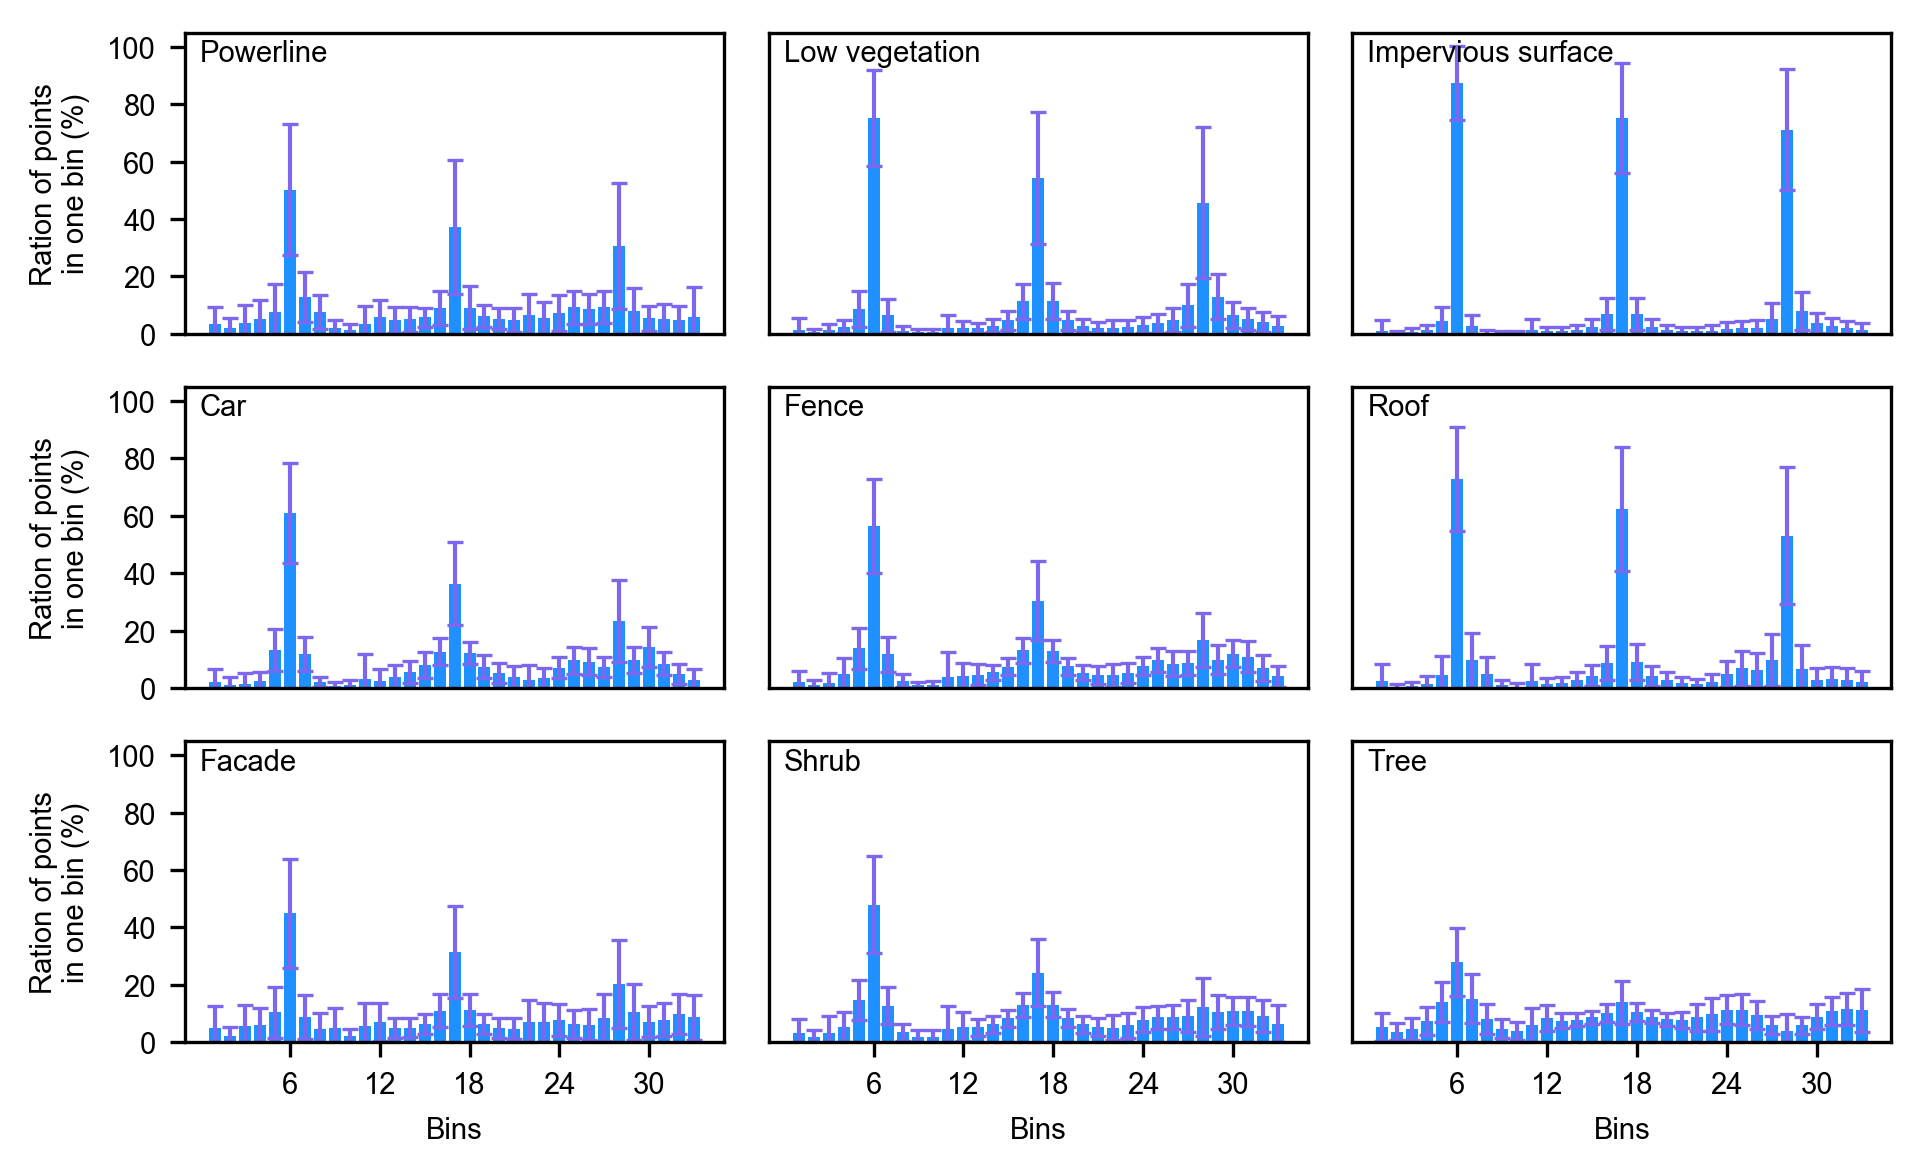

In [7]:
fig = plt.figure(figsize=(6.3, 3.8), constrained_layout=True)
widths = [5, 5, 5]
heights = [3, 3, 3]
gs = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

for i in range(len(class_name)):
    specify_class = train_data_class == i
    feature = train_data_fpfh[specify_class]
    feature_std = np.std(feature, axis=0)
    feature_mean = np.mean(feature, axis=0)
    
    row = i//3
    col = i%3
    ax = fig.add_subplot(gs[row, col])
    plot_x = np.arange(len(feature_mean))+1
    ax.errorbar(plot_x, feature_mean, yerr = feature_std, linewidth=0, ecolor='#7b68ee', 
                elinewidth = 1, capsize = 2, capthick=0.8, label = 'fpfh_std')
    ax.bar(plot_x, feature_mean, color='#1e90ff', lw=2, label = 'fpfh')
    
    ax.set_ylim(0,105)
    if col == 0:
        ax.set_yticks(np.arange(0, 101, 20))
        ax.set_yticklabels(np.arange(0, 101, 20))
        ax.set_ylabel('Ration of points\nin one bin (%)')
    else:
        ax.yaxis.set_tick_params(left=False, labelleft=False)
        
    ax.set_xlim(-1,35)
    if row == 2:
        ax.set_xticks(np.arange(6, 34, 6))
        ax.set_xticklabels(np.arange(6, 34, 6))
        ax.set_xlabel('Bins')
    else:
        ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
        
    ax.text(0, 95, class_name[i])
    
fig.savefig("result/figure/fpfh_each_object.png")